In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",sep=",",encoding="ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
## First we will remove unnecessary Columns
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [6]:
## Rename the Columns 
df.rename({"v1":"label","v2":"message"},axis=1,inplace=True)
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


(ham     4825
 spam     747
 Name: label, dtype: int64,
 <Axes: xlabel='label', ylabel='count'>)

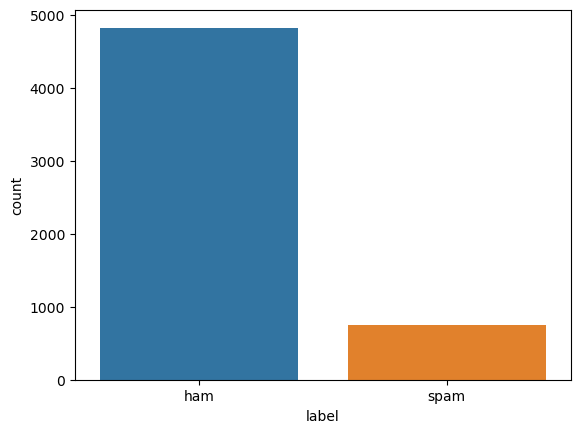

In [7]:
## To check the the dataset is Balanced or Imbalaced 
df["label"].value_counts(),sns.countplot(x=df["label"])

#### From the above plot we can see that dataset is imbalanced and out of 5572 SMS,we have 

#### 1. 4825 ham SMS 
#### 2. 747 Spam SMS 

In [8]:
## Import nltk library to do NLP tasks 
# (*) Will import all modules from that library
import nltk
## For stopwords
from nltk.corpus import *
# For Stemming and Lemmatization Preprocessing Models
from nltk.stem import *
## For regex Modlue to find patterns and preprorcessing of text
import re
## Install wordnet 
!pip install wordnet
## Import wordnet for Lemmatization process to find meaningful word
nltk.download('wordnet')
## To unzip the corpora wordnet
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
replace /usr/share/nltk_data/corpora/wordnet/lexnames? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


### Define Function for stemming and Lemmatization Text Preprocessing

In [9]:
def preprocess_text(text, use_stemming=True, use_lemmatization=True):
    '''It Takes 3 Argumetns , first one is input(text) , input has to be in entries in dataframe,
    if For Stemmed text then we have to put use_stemming as True and use_lemmatization as False,
    and for Lemmatized text vice Versa.'''
#each time the function is called, it initializes a fresh corpus list and processes 
#the text accordingly, ensuring that you get the desired stemmed or lemmatized corpus based on the arguments provided.
    corpus = []
    ## When tuning the parameters for better accuracy ,
    ##we can change the stemmer/Lemmatizer to see variation of accuracy
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    
    for i in range(len(text)):
        review = re.sub('[^a-zA-Z]', ' ', text[i])
        review = review.lower().split()
        
        if use_stemming:
            review = [stemmer.stem(word) for word in review if word not in stopwords.words("english")]
        elif use_lemmatization:
            review = [lemmatizer.lemmatize(word) for word in review if word not in stopwords.words("english")]
        
        review = " ".join(review)
        corpus.append(review)
    
    return corpus


## Check the Defined Function is Giving Lemmatized and stemmed Words Correctly or Not 

In [10]:
## Give input for the first argument of preprocess_text funtion
text=df['message']
## Stemmed text after Stemming 
Stemmed_text = preprocess_text(text, use_stemming=True, use_lemmatization=False)
## Stemmed text after Lemmatization
Lemmatized_text = preprocess_text(text, use_stemming=False, use_lemmatization=True)

In [11]:
## We can see that differnt text for stemming and lemmatization
for i in range(2490,2495):
    print(Stemmed_text[i])
    print(Lemmatized_text[i])
    print()

dun b sad dun thk abt alreadi concentr ur paper k
dun b sad dun thk abt already concentrate ur paper k

greet consid excus
greeting consider excused

drama pl enough famili struggl hot sun strang place reason ego go invit actual necess go wait seriou reppurcuss
drama pls enough family struggling hot sun strange place reason ego going invited actually necessity go wait serious reppurcussions

releas anoth italian one today cosign option
released another italian one today cosign option

mu tri figur much money everyon ga alcohol jay tri figur weed budget
mu try figure much money everyone gas alcohol jay trying figure weed budget



### Now we have Stemmed Corpus but we still didnt convert it into Numerical/Vector represation to feed into Model

### Here We are going to Perform 2 types of Text representation of Independent features(Text data)
1.  BOW Model
2. TF-IDF Model

#### For now we are going to give one type of Stemmed text either Stemmed or Lemmatized text, based on the accuracy of the model we are going to change the parametrs like 
1. Text Representation model(BOW or TF-IDF)
2. Max features in Text representation model
2. Type of Stemming


## Text representaion Models

for More about these models refer [feature extraction from text models](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text)

In [12]:
import sklearn
from sklearn.feature_extraction.text import *


In [13]:
def Text_representation_models(text_corpus,use_BOW=True,use_TFIDF=True,max_features=None) :
    if use_BOW :
        vectorizer = CountVectorizer(max_features=max_features) 
    elif use_TFIDF :
        vectorizer =TfidfVectorizer(max_features=max_features)   
    else:
        raise ValueError("Invalid text representation flag.")
        
    X = vectorizer.fit_transform(text_corpus).toarray()
    ##  Using these models returns the Sparsed Matrix of text 
    return X

In [14]:
## while checking for accuracy we can change the type of stemming and type of text representation
text_corpus=Stemmed_text
features=Text_representation_models(text_corpus,use_BOW=True,use_TFIDF=False,max_features=5000)
features,features.shape,type(features)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 (5572, 5000),
 numpy.ndarray)

### we got features now but we still have target column which is still in text format we can convert that using one_hot or Label Encoding or pd.get_dummies method

In [15]:
## We are converting target column from text format to numerical representation using pd_get dummies method
target=pd.get_dummies(data=df["label"],drop_first=True)
# Target Column
print(target,"\n\n",target.value_counts())

      spam
0        0
1        0
2        1
3        0
4        0
...    ...
5567     1
5568     0
5569     0
5570     0
5571     0

[5572 rows x 1 columns] 

 spam
0       4825
1        747
dtype: int64


#### Here spam is Converted as 1 and ham is Converted as 0 , we can check for both spam and ham target column by deleting other column,Based on the accuracy of final model.

In [16]:
# import Necessary Libraries to build model and to check performance of Model
from sklearn.pipeline import Pipeline
# To import Logistic regression Models
from sklearn.linear_model import *
#for Metrics
from sklearn.metrics import *
## To train_test_split method
from sklearn.model_selection import *
# For Naive Bayes method
from sklearn.naive_bayes import *
# For Support vector Machine
from sklearn.svm import SVC


### Define a function to transform the text data and to return Train and test  data 

In [17]:
def fit_data(text,target,use_stemming=True,use_lemmatization=True,use_BOW=True,use_TFIDF=True):
    # Code to evaluate the model using the provided data and calculate performance metrics
    ''' if we use stemming we have 2 representaions for that BOW and TFIDF,same is for Lemmatization
     and this function takes 5 arguments and 1 st one is the type model,
     for 2nd and 3rd argument we can give only Preprocessing step as True
     for 4th and 5th argument ,we can give only one type of Text representation as True '''
    # Initialize the features variable
    features = np.array([])    ## Text Preprocessing and preparing the features 
    stemmed_text=preprocess_text(text, use_stemming=True, use_lemmatization=False)
    lemmatized_text=preprocess_text(text, use_stemming=False, use_lemmatization=True)
    if use_stemming and  use_BOW :
        text_corpus=stemmed_text
        features=Text_representation_models(text_corpus,use_BOW=True,use_TFIDF=False,max_features=5000)
    
    elif use_stemming and  use_TFIDF :
        text_corpus=stemmed_text
        features=Text_representation_models(text_corpus,use_BOW=False,use_TFIDF=True,max_features=5000) 
        
    elif use_lemmatization and use_BOW :  
        text_corpus=lemmatized_text
        features=Text_representation_models(text_corpus,use_BOW=True,use_TFIDF=False,max_features=5000)
    
    elif use_lemmatization and use_TFIDF:
            text_corpus=lemmatized_text
            features=Text_representation_models(text_corpus,use_BOW=False,use_TFIDF=True,max_features=5000)

    else :
        raise ValueError("Invalid combination of text preprocessing and text representation  flags.")
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.3,random_state=50)

    return X_train, X_test, y_train, y_test
        

In [18]:
text=df["message"]
## Assigning Target Column to traget variable
target=target
X_train, X_test, y_train, y_test=fit_data(text,target,use_stemming=True,use_lemmatization=False,use_BOW=True,use_TFIDF=False)
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Define a function to  evaluate the model results 

In [19]:
def evaluate_model(model,X_test,y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1_micro = f1_score(y_test, predictions, average='micro')
    f1_macro = f1_score(y_test, predictions, average='macro')
    f1_weighted = f1_score(y_test, predictions, average='weighted')
    recall_micro = recall_score(y_test, predictions, average='micro')
    recall_macro = recall_score(y_test, predictions, average='macro')
    recall_weighted = recall_score(y_test, predictions, average='weighted')
    precision_micro = precision_score(y_test, predictions, average='micro')
    precision_macro = precision_score(y_test, predictions, average='macro')
    precision_weighted = precision_score(y_test, predictions, average='weighted')
    cm = confusion_matrix(y_test, predictions)
    
    return {
        'accuracy': accuracy,
        'f1_micro': f1_micro,
        'f1_macro': f1_macro,
        'f1_weighted': f1_weighted,
        'recall_micro': recall_micro,
        'recall_macro': recall_macro,
        'recall_weighted': recall_weighted,
        'precision_micro': precision_micro,
        'precision_macro': precision_macro,
        'precision_weighted': precision_weighted,
        'confusion_matrix': cm
    }

### Define a function to get Combination of Preprocessed data and Text representation and to split the data and iterate over models using other Defined Functions

In [20]:
def find_best_model(models,text,target):
    best_model = None
    best_f1_score = float('-inf')

    for use_stemming in [True, False]:
        for use_lemmatization in [True, False]:
            for use_BOW in [True, False]:
                for use_TFIDF in [True, False]:
                    # Ensure only one type of preprocessing is used
                    if ((use_stemming and use_lemmatization) or (not use_stemming and not use_lemmatization)) :
                        continue #skip if both stemming and lemmatization enabled and if  both are disabled
            
                    if ((use_BOW and use_TFIDF) or (not use_BOW and not use_TFIDF)):
                        continue  # Skip if both BOW and TFIDF are enabled or if both are  disabled
                    try:
                        ## Get Train and test data by defined function
                        X_train, X_test, y_train, y_test = fit_data(text, target, use_stemming, use_lemmatization, use_BOW, use_TFIDF)
                    except ValueError:
                        continue  # Skip the invalid combination
                        '''Now we have train and test data now we can fit the model 
                                with train data and iterate over all models'''
                    ## Train the model with training data
                    for model in models:
                        model.fit(X_train, y_train)
                        # Get Performance of Model for Test data
                        model_results = evaluate_model(model, X_test, y_test)
                        f1_avg = (model_results['f1_micro'] + model_results['f1_macro'] + model_results['f1_weighted']) / 3

                        # Print the results for each model and parameter combination
                        print("Model:", model)
                        print("Use Stemming:", use_stemming)
                        print("Use Lemmatization:", use_lemmatization)
                        print("Use BOW:", use_BOW)
                        print("Use TFIDF:", use_TFIDF)
                        print("Accuracy:", model_results['accuracy'])
                        print("F1 Score (Micro):", model_results['f1_micro'])
                        print("F1 Score (Macro):", model_results['f1_macro'])
                        print("F1 Score (Weighted):", model_results['f1_weighted'])
                        print("Recall (Micro):", model_results['recall_micro'])
                        print("Recall (Macro):", model_results['recall_macro'])
                        print("Recall (Weighted):", model_results['recall_weighted'])
                        print("Precision (Micro):", model_results['precision_micro'])
                        print("Precision (Macro):", model_results['precision_macro'])
                        print("Precision (Weighted):", model_results['precision_weighted'])
                        print("Confusion Matrix:\n", model_results['confusion_matrix'])
                        print("F1 Score (Average):" ,f1_avg)
                        print()

                        # Update the best model if necessary
                        if f1_avg > best_f1_score:
                            best_model = (model, use_stemming, use_lemmatization, use_BOW, use_TFIDF)
                            best_f1_score = f1_avg

    return best_model

In [21]:
## import necessary libraries for models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import RidgeClassifier, PassiveAggressiveClassifier


## List of Classification Models to check performance of each model on this task 
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    GaussianNB(),
    MultinomialNB(),
    ComplementNB(),
    BernoulliNB(),
    KNeighborsClassifier(),
    XGBClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    GaussianProcessClassifier(),
    ExtraTreesClassifier(),
    RidgeClassifier(),
    PassiveAggressiveClassifier()
]


In [22]:
## To Check Performance of each models for different Combination of Text Preprocessing and representaion and different Models
## Assign the text data it will convert into the features 
#text=df["message"]
## Assigning Target Column to traget variable
#target=target
#best_model = find_best_model(models,text,target)
#print("Best Model:", best_model)

In [27]:
def find_best_model(models, text, target):
    best_model = None
    best_f1_score = float('-inf')
    model_results = []  # Store the results of each model

    for use_stemming in [True, False]:
        for use_lemmatization in [True, False]:
            for use_BOW in [True, False]:
                for use_TFIDF in [True, False]:
                    # Ensure only one type of preprocessing is used
                    if ((use_stemming and use_lemmatization) or (not use_stemming and not use_lemmatization)):
                        continue  # Skip if both stemming and lemmatization are enabled or if both are disabled

                    if ((use_BOW and use_TFIDF) or (not use_BOW and not use_TFIDF)):
                        continue  # Skip if both BOW and TFIDF are enabled or if both are disabled
                    try:
                        # Get Train and test data by defined function
                        X_train, X_test, y_train, y_test = fit_data(text, target, use_stemming, use_lemmatization, use_BOW, use_TFIDF)
                        y_train = np.array(y_train).ravel()  # Reshape y_train to a 1D array
                        y_test = np.array(y_test).ravel()  # Reshape y_test to a 1D array
                    except ValueError:
                        continue  # Skip the invalid combination

                    # Train the model with training data
                    for model in models:
                        model.fit(X_train, y_train)
                        # Get Performance of Model for Test data
                        model_results_dict = evaluate_model(model, X_test, y_test)
                        f1_avg = (model_results_dict['f1_micro'] + model_results_dict['f1_macro'] + model_results_dict['f1_weighted']) / 3

                        # Store the results in a dictionary
                        results = {
                            'Model': model,
                            'Use Stemming': use_stemming,
                            'Use Lemmatization': use_lemmatization,
                            'Use BOW': use_BOW,
                            'Use TFIDF': use_TFIDF,
                            'Accuracy': model_results_dict['accuracy'],
                            'F1 Score (Micro)': model_results_dict['f1_micro'],
                            'F1 Score (Macro)': model_results_dict['f1_macro'],
                            'F1 Score (Weighted)': model_results_dict['f1_weighted'],
                            'Recall (Micro)': model_results_dict['recall_micro'],
                            'Recall (Macro)': model_results_dict['recall_macro'],
                            'Recall (Weighted)': model_results_dict['recall_weighted'],
                            'Precision (Micro)': model_results_dict['precision_micro'],
                            'Precision (Macro)': model_results_dict['precision_macro'],
                            'Precision (Weighted)': model_results_dict['precision_weighted'],
                            'Confusion Matrix': model_results_dict['confusion_matrix'],
                            'F1 Score (Average)': f1_avg
                        }
                        model_results.append(results)  # Add the results to the list

                        # Update the best model if necessary
                        if f1_avg > best_f1_score:
                            best_model = (model, use_stemming, use_lemmatization, use_BOW, use_TFIDF)
                            best_f1_score = f1_avg

    return best_model, model_results

In [ ]:
## To Check Performance of each models for different Combination of Text Preprocessing and representaion and different Models
## Assign the text data it will convert into the features 
text=df["message"]
## Assigning Target Column to traget variable
target=target
# Call the function and get the best model and model results
best_model, results = find_best_model(models, text, target)

# Print the best model
print("Best Model:", best_model)
# Create a DataFrame from the results list
df_results = pd.DataFrame(model_results)


In [ ]:
df_results

#### From the all of the above Classification Models we can see that MLP Classifier Model  with Lemmatization as Preprocessing and TFIDF as Text Representation is Doing a better job for this task and also its Overall accuracy  Precision, Recall F1 scores are good compared to others.

#### Try to Increase the Model accuracy and Avg F1 Score by 
1. changing Parameters of the Model and Trying  Different Models for Classification
2. Changing Text Preprocessing techniques 
3. Changing Number of Maximum(Best) features of Text Represetation Model.
4. Trying different Stemmers or Lemmatizers Models 
5. Changing the Categorical Encoding of the Target Column
6. Checking if we Provide higher Values to Spam or Ham.[ 0 or 1]
7. Changing the Dimensions of Train and test data
8. Check  Performance by Adding Validation Data
9. Changing the Random seed while splitting the data  
10. Data Sampling for the Imbalanced data
11. Cross Validation
12. Regularization Techniques to prevent Overfitting
13. Try Hyperparameter Tuning With Gridsearch, RandomSearch,Bayestian Optimazation
14. Check for the other Text Representation models like word2vec, ngram
15. Check for Different Combination of words while vectorizing the words in BOW or TFIDF in ngram range paramter and try to change other parameters of Text Representation Models you can get parameters set by model by [get_params](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.get_params)and  you can change it according to accuracy you can check features names or (Words that got Vectorized using Text representation Model [vectorizer.get_feature_names_out(input_features=None)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.get_feature_names_out)